# Parte 1: EDA 
El objetivo de este notebook es realizar un análisis exploratorio para entender los datos antes de pensar en realizar un modelo de predicción

# Configuración inicial para añadir  la raiz del pryecto al sys.path y no tener problemas con carga/importación de modulos/files

In [1]:
import os
import sys

project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

os.chdir(project_root)
print(f"Directorio de trabajo actual cambiado a: {os.getcwd()}")


Directorio de trabajo actual cambiado a: /Users/david.bayter/Documents/Private/challenge-ds-meli


# 1. Carga de los datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from config.config import configs
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

from src.utils.json_adv_utils import detect_json_columns, summarize_json_column, expand_json_column
from src.utils.aux_colums_functions import drop_column_variations, replace_empty_with_nan, get_unique_values_from_variations, summarize_nulls
from src.utils.feature_engineering import group_payment_method, group_payment_method, group_payment_method, impute_data,add_warranty_features, calcular_diferencia_meses, add_title_flags
from src.utils.convert_datatype_utils import set_datatypes



In [4]:
df = pd.read_json(configs.PATH_DATA, lines=True)
print(df.shape)
df.sample(10)

(100000, 45)


,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,...,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
42667,"{'country': {'name': 'Argentina', 'id': 'AR'},...","Cualquier error de impresion, por parte nuestr...",[],new,[],650.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Acordar con el comprador', '...",2689372547,[],...,2015-10-30 13:20:28,active,None,NaN,NaN,998,2015-08-31 13:20:28,http://articulo.mercadolibre.com.ar/MLA7617741...,1,998
70725,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],2000.00,"{'local_pick_up': False, 'methods': [], 'tags'...",[],3301327429,[],...,2015-11-13 23:33:28,active,None,NaN,NaN,1,2015-09-14 23:33:28,http://articulo.mercadolibre.com.ar/MLA5842087...,0,1
36056,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],799.99,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",4620340074,[{'attribute_combinations': [{'value_id': '920...,...,2015-10-23 00:15:03,active,None,NaN,NaN,7,2015-08-24 00:15:03,http://articulo.mercadolibre.com.ar/MLA5823015...,1,7
64045,"{'country': {'name': 'Argentina', 'id': 'AR'},...",6 MESES DE GARANTIA,[],new,[],219.88,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",7772844348,[],...,2015-11-03 14:00:37,active,None,NaN,NaN,97,2015-09-04 14:00:37,http://articulo.mercadolibre.com.ar/MLA9230349...,0,97
55594,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],125000.00,"{'local_pick_up': False, 'methods': [], 'tags'...",[],2531856043,[],...,2015-11-14 03:18:04,active,None,NaN,NaN,1,2015-07-28 23:49:15,http://auto.mercadolibre.com.ar/MLA1085497694-...,0,1
24223,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sin garantía,[],used,[],68.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",9653008862,[],...,2015-11-25 16:27:22,active,None,NaN,NaN,1,2015-09-26 16:27:22,http://articulo.mercadolibre.com.ar/MLA3713718...,0,1
82751,"{'country': {'name': 'Argentina', 'id': 'AR'},...",12 meses,[],new,[],89.00,"{'local_pick_up': False, 'methods': [], 'tags'...",[],5605621603,[],...,2015-12-02 17:05:31,paused,None,NaN,NaN,1,2015-10-03 17:05:31,http://articulo.mercadolibre.com.ar/MLA3555794...,0,1
74093,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],100.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",4264252688,[],...,2015-11-28 13:58:46,active,None,NaN,NaN,1,2015-09-29 13:58:46,http://articulo.mercadolibre.com.ar/MLA9402289...,0,1
54417,"{'country': {'name': 'Argentina', 'id': 'AR'},...",12 meses,[],new,[],899.00,"{'local_pick_up': True, 'free_methods': [{'rul...",[],5894125590,[],...,2015-10-31 02:24:12,paused,None,NaN,NaN,2,2015-09-01 02:24:12,http://articulo.mercadolibre.com.ar/MLA9335794...,0,2
65507,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Garantía Oficial 1 Año de BGH S.A.,[],used,[],800.00,"{'local_pick_up': False, 'free_methods': [{'ru...","[{'description': 'Transferencia bancaria', 'id...",7497258574,[],...,2015-11-13 19:00:00,paused,None,NaN,NaN,10,2015-09-14 19:00:00,http://articulo.mercadolibre.com.ar/MLA4647690...,4,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   seller_address                    100000 non-null  object        
 1   warranty                          39104 non-null   object        
 2   sub_status                        100000 non-null  object        
 3   condition                         100000 non-null  object        
 4   deal_ids                          100000 non-null  object        
 5   base_price                        100000 non-null  float64       
 6   shipping                          100000 non-null  object        
 7   non_mercado_pago_payment_methods  100000 non-null  object        
 8   seller_id                         100000 non-null  int64         
 9   variations                        100000 non-null  object        
 10  site_id                          

condition
new     0.53758
used    0.46242
Name: proportion, dtype: float64


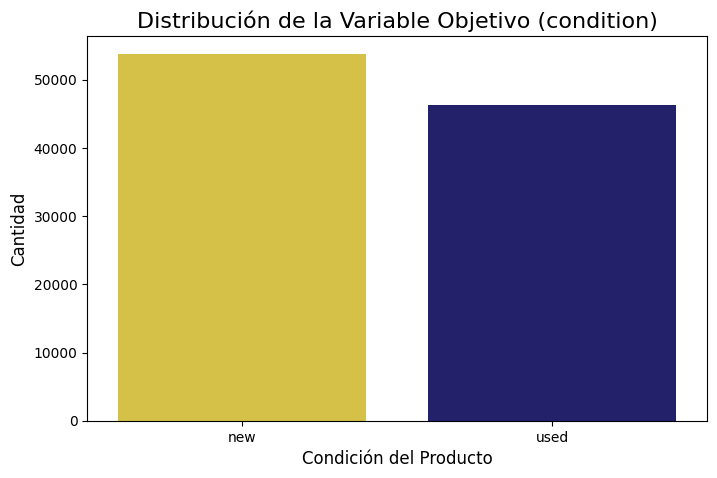

El dataset muestra una distribución 'balanceada' entre las clases used y new. Esto favorecerá el análisis y construcción del modelo posterior


In [6]:
print(df.condition.value_counts(normalize=True))
plt.figure(figsize=(8, 5))
sns.countplot(x='condition', data=df, palette=['#eed130', '#171576'])
plt.title('Distribución de la Variable Objetivo (condition)', fontsize=16)
plt.xlabel('Condición del Producto', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
print("El dataset muestra una distribución 'balanceada' entre las clases used y new. Esto favorecerá el análisis y construcción del modelo posterior")


 ##### Hallazgos
 Al cargar los datos y como primera impresión del dataset, notamos que de las 44 características, algunas de ellas tienen campos aninados o JSON como información.  Con la finalidad de poder trabajar con datos tabulares para continuar con el análisis, buscaremos convertir estos campos anidados en features planas, expandiendo el JSON.  Sin embargo, no todas las características necesariamente deben ser expandidas y convertirse en columnas, sino, solo aquellas que tengan información de valor predictivo para nuestro target "condition column".  Para ello, antes de definir que columnas extraer, evaluaremos la información que contienen, identificando las columnas que tengan tipo de datos (List o Dict o Str JSON) y  realizaremos un análisis de su contenido

# 2. Analizando DATA


## 2.1  Detectando y Analizando contenido de las columnas JSON

In [7]:
raw_json_cols = detect_json_columns(df)
print("Columnas JSON encontradas:", raw_json_cols)

print("Excluyendo columnas que si bien tienen datos JSON, revisada su contenido fueron encontradas como irrelevantes para el analisis al contener información no muy estructurada o demasiado ruido que dificulta el análisis.")
col_to_exclude = ['deal_ids', 'variations', 'attributes', 'coverage_areas', 'descriptions', 'pictures']

json_cols = [col for col in raw_json_cols if col not in col_to_exclude]
print("Columnas JSON a analizar:", json_cols)

Columnas JSON encontradas: ['seller_address', 'sub_status', 'deal_ids', 'shipping', 'non_mercado_pago_payment_methods', 'variations', 'attributes', 'tags', 'coverage_areas', 'descriptions', 'pictures']
Excluyendo columnas que si bien tienen datos JSON, revisada su contenido fueron encontradas como irrelevantes para el analisis al contener información no muy estructurada o demasiado ruido que dificulta el análisis.
Columnas JSON a analizar: ['seller_address', 'sub_status', 'shipping', 'non_mercado_pago_payment_methods', 'tags']


In [8]:
df_concatenated = pd.DataFrame()
for col in json_cols:

    summary = summarize_json_column(df[col])
    print(f"Resumen de la columna {col}:")
    print(summary)


    df_flat = expand_json_column(df, col, prefix=col).drop(columns=df.columns, errors='ignore')
    
    if df_flat.empty:
        print(f"La columna {col} no contiene datos para expandir.")
        continue
    display(df_flat.sample(10))
    print("\n")
    display(df_flat.info())
    print("\n")
    display(df_flat.describe())
    
    df_concatenated = pd.concat([df_concatenated, df_flat], axis=1)
    print("\n" + "="*50 + "\n")

    

Resumen de la columna seller_address:
{'total_rows': 100000, 'non_null_rows': 100000, 'unique_values': 4004, 'top_n': [({'city': {'id': '', 'name': 'CABA'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'state': {'id': 'AR-C', 'name': 'Capital Federal'}}, 4082), ({'city': {'id': '', 'name': 'Capital Federal'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'state': {'id': 'AR-C', 'name': 'Capital Federal'}}, 3334), ({'city': {'id': 'TUxBQlBBTDI1MTVa', 'name': 'Palermo'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'state': {'id': 'AR-C', 'name': 'Capital Federal'}}, 3305), ({'city': {'id': '', 'name': 'Buenos Aires'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'state': {'id': 'AR-C', 'name': 'Capital Federal'}}, 3138), ({'city': {'id': 'TUxBQkNBQjM4MDda', 'name': 'Caballito'}, 'country': {'id': 'AR', 'name': 'Argentina'}, 'state': {'id': 'AR-C', 'name': 'Capital Federal'}}, 2909), ({'city': {'id': 'TUxBQkJFTDcyNTJa', 'name': 'Belgrano'}, 'country': {'id': 'AR', 'name': 'Argentina'}

,seller_address_country.name,seller_address_country.id,seller_address_state.name,seller_address_state.id,seller_address_city.name,seller_address_city.id
19450,Argentina,AR,Buenos Aires,AR-B,Mar del Plata,TUxBQ01BUjU2MGMw
18381,Argentina,AR,Buenos Aires,AR-B,SAN MARTIN,
23879,Argentina,AR,Capital Federal,AR-C,buenos aires,
52617,Argentina,AR,Capital Federal,AR-C,Paternal,TUxBQlBBVDI0ODFa
58870,Argentina,AR,Capital Federal,AR-C,BARRIO NORTE,
54116,Argentina,AR,Capital Federal,AR-C,Boedo,TUxBQkJPRTQ0OTRa
45747,Argentina,AR,Capital Federal,AR-C,caba,
31571,Argentina,AR,Capital Federal,AR-C,CABA,
43298,Argentina,AR,Capital Federal,AR-C,Palermo,TUxBQlBBTDI1MTVa
94614,Argentina,AR,Capital Federal,AR-C,Buenos Aires,




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   seller_address_country.name  100000 non-null  object
 1   seller_address_country.id    100000 non-null  object
 2   seller_address_state.name    100000 non-null  object
 3   seller_address_state.id      100000 non-null  object
 4   seller_address_city.name     100000 non-null  object
 5   seller_address_city.id       100000 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


None

,seller_address_country.name,seller_address_country.id,seller_address_state.name,seller_address_state.id,seller_address_city.name,seller_address_city.id
count,100000,100000,100000,100000,100000,100000
unique,2,2,25,25,3656,295
top,Argentina,AR,Capital Federal,AR-C,CABA,
freq,99997,99997,57854,57854,4098,54574




Resumen de la columna sub_status:
{'total_rows': 100000, 'non_null_rows': 100000, 'unique_values': 4, 'top_n': [([], 99014), (['suspended'], 966), (['expired'], 13), (['deleted'], 7)]}


,sub_status_deleted,sub_status_expired,sub_status_suspended
79024,0,0,0
72007,0,0,0
45583,0,0,0
59522,0,0,1
82051,0,0,0
57756,0,0,0
63674,0,0,0
2137,0,0,0
5364,0,0,0
4674,0,0,0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   sub_status_deleted    100000 non-null  int64
 1   sub_status_expired    100000 non-null  int64
 2   sub_status_suspended  100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


None

,sub_status_deleted,sub_status_expired,sub_status_suspended
count,100000.000000,100000.000000,100000.00000
mean,0.000070,0.000130,0.00966
std,0.008366,0.011401,0.09781
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.00000




Resumen de la columna shipping:
{'total_rows': 100000, 'non_null_rows': 100000, 'unique_values': 40, 'top_n': [({'dimensions': None, 'free_shipping': False, 'local_pick_up': True, 'methods': [], 'mode': 'me2', 'tags': []}, 41518), ({'dimensions': None, 'free_shipping': False, 'local_pick_up': True, 'methods': [], 'mode': 'not_specified', 'tags': []}, 32809), ({'dimensions': None, 'free_shipping': False, 'local_pick_up': False, 'methods': [], 'mode': 'not_specified', 'tags': []}, 12338), ({'dimensions': None, 'free_shipping': False, 'local_pick_up': False, 'methods': [], 'mode': 'me2', 'tags': []}, 6695), ({'dimensions': None, 'free_shipping': False, 'local_pick_up': True, 'methods': [], 'mode': 'custom', 'tags': []}, 2941), ({'dimensions': None, 'free_methods': [{'id': 73328, 'rule': {'free_mode': 'country', 'value': None}}], 'free_shipping': True, 'local_pick_up': True, 'mode': 'me2', 'tags': []}, 2183), ({'dimensions': None, 'free_methods': [{'id': 73328, 'rule': {'free_mode': 'cou

,shipping_local_pick_up,shipping_methods,shipping_tags,shipping_free_shipping,shipping_mode,shipping_dimensions,shipping_free_methods
44151,True,[],[],False,me2,None,NaN
56308,True,[],[],False,me2,None,NaN
67227,True,[],[],False,me2,None,NaN
8306,True,[],[],False,me2,None,NaN
16264,True,[],[],False,me2,None,NaN
65759,False,[],[],False,me2,None,NaN
75045,True,[],[],False,not_specified,None,NaN
63892,True,[],[],False,me2,None,NaN
79271,True,[],[],False,me2,None,NaN
29633,True,[],[],False,me2,None,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   shipping_local_pick_up  100000 non-null  bool  
 1   shipping_methods        96992 non-null   object
 2   shipping_tags           100000 non-null  object
 3   shipping_free_shipping  100000 non-null  bool  
 4   shipping_mode           100000 non-null  object
 5   shipping_dimensions     23 non-null      object
 6   shipping_free_methods   3006 non-null    object
dtypes: bool(2), object(5)
memory usage: 4.0+ MB


None

,shipping_local_pick_up,shipping_methods,shipping_tags,shipping_free_shipping,shipping_mode,shipping_dimensions,shipping_free_methods
count,100000,96992,100000,100000,100000,23,3006
unique,2,1,3,2,4,13,5
top,True,[],[],False,me2,"33x20x12,300","[{'rule': {'value': None, 'free_mode': 'countr..."
freq,79561,96992,99931,96984,51255,4,2955




Resumen de la columna non_mercado_pago_payment_methods:
{'total_rows': 100000, 'non_null_rows': 100000, 'unique_values': 188, 'top_n': [([], 30559), ([{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 22536), ([{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Tarjeta de crédito', 'id': 'MLAOT', 'type': 'N'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 20776), ([{'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 14325), ([{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 2566), ([{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Tarjeta de crédito', 'id': 'MLAOT', 'type': 'N'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'descriptio

,non_mercado_pago_payment_methods_description0,non_mercado_pago_payment_methods_id0,non_mercado_pago_payment_methods_type0,non_mercado_pago_payment_methods_description1,non_mercado_pago_payment_methods_id1,non_mercado_pago_payment_methods_type1,non_mercado_pago_payment_methods_description2,non_mercado_pago_payment_methods_id2,non_mercado_pago_payment_methods_type2,non_mercado_pago_payment_methods_description3,...,non_mercado_pago_payment_methods_type8,non_mercado_pago_payment_methods_description9,non_mercado_pago_payment_methods_id9,non_mercado_pago_payment_methods_type9,non_mercado_pago_payment_methods_description10,non_mercado_pago_payment_methods_id10,non_mercado_pago_payment_methods_type10,non_mercado_pago_payment_methods_description11,non_mercado_pago_payment_methods_id11,non_mercado_pago_payment_methods_type11
90589,Transferencia bancaria,MLATB,G,Acordar con el comprador,MLAWC,G,Efectivo,MLAMO,G,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47507,Transferencia bancaria,MLATB,G,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83687,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48942,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94497,Transferencia bancaria,MLATB,G,Tarjeta de crédito,MLAOT,N,Efectivo,MLAMO,G,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,Transferencia bancaria,MLATB,G,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86255,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42969,Acordar con el comprador,MLAWC,G,Efectivo,MLAMO,G,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   non_mercado_pago_payment_methods_description0   69441 non-null  object
 1   non_mercado_pago_payment_methods_id0            69441 non-null  object
 2   non_mercado_pago_payment_methods_type0          69441 non-null  object
 3   non_mercado_pago_payment_methods_description1   53232 non-null  object
 4   non_mercado_pago_payment_methods_id1            53232 non-null  object
 5   non_mercado_pago_payment_methods_type1          53232 non-null  object
 6   non_mercado_pago_payment_methods_description2   28020 non-null  object
 7   non_mercado_pago_payment_methods_id2            28020 non-null  object
 8   non_mercado_pago_payment_methods_type2          28020 non-null  object
 9   non_mercado_pago_payment_methods_description3  

None

,non_mercado_pago_payment_methods_description0,non_mercado_pago_payment_methods_id0,non_mercado_pago_payment_methods_type0,non_mercado_pago_payment_methods_description1,non_mercado_pago_payment_methods_id1,non_mercado_pago_payment_methods_type1,non_mercado_pago_payment_methods_description2,non_mercado_pago_payment_methods_id2,non_mercado_pago_payment_methods_type2,non_mercado_pago_payment_methods_description3,...,non_mercado_pago_payment_methods_type8,non_mercado_pago_payment_methods_description9,non_mercado_pago_payment_methods_id9,non_mercado_pago_payment_methods_type9,non_mercado_pago_payment_methods_description10,non_mercado_pago_payment_methods_id10,non_mercado_pago_payment_methods_type10,non_mercado_pago_payment_methods_description11,non_mercado_pago_payment_methods_id11,non_mercado_pago_payment_methods_type11
count,69441,69441,69441,53232,53232,53232,28020,28020,28020,3536,...,452,352,352,352,281,281,281,75,75,75
unique,11,11,4,12,12,4,11,11,4,12,...,2,4,4,2,3,3,2,1,1,1
top,Transferencia bancaria,MLATB,G,Efectivo,MLAMO,G,Efectivo,MLAMO,G,Efectivo,...,G,Efectivo,MLAMO,G,American Express,MLAAM,C,American Express,MLAAM,C
freq,50335,50335,67207,25320,25320,29499,24026,24026,27597,2415,...,358,210,210,211,205,205,205,75,75,75




Resumen de la columna tags:
{'total_rows': 100000, 'non_null_rows': 100000, 'unique_values': 8, 'top_n': [(['dragged_bids_and_visits'], 72551), ([], 24910), (['good_quality_thumbnail', 'dragged_bids_and_visits'], 1330), (['dragged_visits'], 516), (['good_quality_thumbnail'], 392), (['dragged_visits', 'free_relist'], 285), (['poor_quality_thumbnail', 'dragged_bids_and_visits'], 11), (['poor_quality_thumbnail'], 5)]}


,tags_dragged_bids_and_visits,tags_dragged_visits,tags_free_relist,tags_good_quality_thumbnail,tags_poor_quality_thumbnail
70728,1,0,0,0,0
21800,1,0,0,0,0
81575,0,0,0,0,0
5328,0,0,0,0,0
52951,1,0,0,0,0
9252,1,0,0,0,0
2201,0,0,0,0,0
74594,1,0,0,0,0
77127,1,0,0,0,0
22456,1,0,0,0,0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   tags_dragged_bids_and_visits  100000 non-null  int64
 1   tags_dragged_visits           100000 non-null  int64
 2   tags_free_relist              100000 non-null  int64
 3   tags_good_quality_thumbnail   100000 non-null  int64
 4   tags_poor_quality_thumbnail   100000 non-null  int64
dtypes: int64(5)
memory usage: 3.8 MB


None

,tags_dragged_bids_and_visits,tags_dragged_visits,tags_free_relist,tags_good_quality_thumbnail,tags_poor_quality_thumbnail
count,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,0.738920,0.00801,0.00285,0.017220,0.000160
std,0.439226,0.08914,0.05331,0.130091,0.012648
min,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.00000,0.00000,0.000000,0.000000
50%,1.000000,0.00000,0.00000,0.000000,0.000000
75%,1.000000,0.00000,0.00000,0.000000,0.000000
max,1.000000,1.00000,1.00000,1.000000,1.000000


### Conclusion del análisis de las columnas JSON
Luego de analizar detalladamente cada una de las columnas JSON, estos fueron los hallazgos:
- seller_address: Contiene información respecto a País, Estado, Ciudad y sus IDs. Quizá Estado o Ciudad pueda ser RELEVANTE.
- sub_status: Información sobre estatus de un producto. Puede ser RELEVANTE.
- deal_ids: Información de IDs. >99% listas vacías. DESCARTADA
- shipping: Contiene información sobre shipping. Si un producto es usado, posiblemente local_pick_up no sea permitido. RELEVANTE
- non_mercado_pago_payment_methods: Contiene informació sobre metodos de pago aceptado. Si un producto es usado, posiblmente no se acepte efectivo/contra-entrega. RELEVANTE
- variations: Contiene información de colores, atributos, entre otros.  No parece ser información relevante y demasiado extensa para analizar en el periodo de tiempo. DESCARTADA
- attributes: Contine información sobre genero, ficha técnica, season, entre otros. No parece ser información relevante y demasiado extensa para analizar en el periodo de tiempo. DESCARTADA 
- tags: Contiene información sobre los items y su comportamiento. Si fue republicado,vistas, etc. RELEVANTE 
- coverage_areas: Al parecer solo contiene listas vacías. DESCARTADA
- descriptions: Contiene información de IDs de los productos. Al no poser información relevante (97% son valores unicos, el resto null) DESCARTADA
- pictures: Contiene bastante información de metadata de las imagenes, sin embargo irrelevante para el alcance del modelo predictivo. DESCARTADA 

### 2.1.1 Eliminando información No relevante de los JSON extendidos

Una vez se logró expandir los JSON considerados relevantes, algunos de ellos contienen información que sigue siendo ruido para nuestros análisis posteriores, principalmente las columnas que vienen de non_mercado_pago_payment_methods, a excepción de ...payment_methods_description, la cual tiene información útil sobre el tipo de pago aceptado por los vendedores. 
Una hipotesis que surge en este punto y será comprobada más adelante, es que, aquellos vendedores que tienen listados artículos usados, muy probablemente no acepten métodos de pagos que permitan "Contracargo"

Se eliminarán las columnas no relevanes para el análisis, puntualmente aquellas que tienen codifiaciones dee IDs o similares.

In [9]:
no_relevant_columns = ['non_mercado_pago_payment_methods_id', 'non_mercado_pago_payment_methods_type', 'seller_address_country.id',  'seller_address_state.id',  'seller_address_city.id']
df_cleaned_concat = df_concatenated.copy()
for col in no_relevant_columns:
    df_cleaned_concat = drop_column_variations(df_cleaned_concat, col)


df_cleaned_concat.shape

Eliminando 12 columnas que comienzan con 'non_mercado_pago_payment_methods_id'...
Eliminando 12 columnas que comienzan con 'non_mercado_pago_payment_methods_type'...
Eliminando 1 columnas que comienzan con 'seller_address_country.id'...
Eliminando 1 columnas que comienzan con 'seller_address_state.id'...
Eliminando 1 columnas que comienzan con 'seller_address_city.id'...


(100000, 30)

### 2.1.2 Agrupando información importante distribuida en variaciones numéricas de columnas

In [10]:
payment_methods = get_unique_values_from_variations(df_cleaned_concat, 'non_mercado_pago_payment_methods_description')
payment_methods

['MercadoPago',
 'Visa',
 'Contra reembolso',
 'Giro postal',
 'American Express',
 'Transferencia bancaria',
 'Cheque certificado',
 'Acordar con el comprador',
 'Visa Electron',
 'Diners',
 'Tarjeta de crédito',
 'Mastercard Maestro',
 'Efectivo',
 'MasterCard']

In [13]:
df_cleaned_concat_enc = group_payment_method(
    df_cleaned_concat, 
    'non_mercado_pago_payment_methods_description'
)

Proceso completado. Se eliminaron 12 columnas originales y se crearon 4 nuevas columnas de grupos de pago.


In [14]:
df_concat_raw = pd.concat([df.drop(columns=raw_json_cols, errors='ignore'), df_cleaned_concat_enc], axis=1)
df_concat_raw.shape

(100000, 56)

## 2.2 Continuando con el Análisis ahora con todas las columnas del dataframe original + las relevantes extendidas de columnas JSON

### 2.2.1 Validando valores nulos

In [15]:
df_concat_raw = replace_empty_with_nan(df_concat_raw)


In [16]:
summarize_nulls(df_concat_raw)

,Cantidad de Nulos,% de Nulos,% de Valores
catalog_product_id,99989,99.989,0.011
shipping_dimensions,99977,99.977,0.023
shipping_tags,99931,99.931,0.069
original_price,99857,99.857,0.143
official_store_id,99182,99.182,0.818
video_id,97015,97.015,2.985
shipping_free_methods,96994,96.994,3.006
warranty,60930,60.930,39.070
parent_item_id,23011,23.011,76.989
thumbnail,789,0.789,99.211


In [17]:
list_col_drop = ['catalog_product_id','shipping_dimensions','shipping_tags', 'original_price', 'official_store_id', 'video_id' , 'parent_item_id', 'thumbnail','secure_thumbnail', 'permalink', 'subtitle', 'seller_address_country.name'
                 ,'differential_pricing','shipping_methods', 'listing_source', 'site_id', 'id']

for col in list_col_drop:
    df_concat_raw = drop_column_variations(df_concat_raw, col)

df_concat_raw.shape
        

Eliminando 1 columnas que comienzan con 'catalog_product_id'...
Eliminando 1 columnas que comienzan con 'shipping_dimensions'...
Eliminando 1 columnas que comienzan con 'shipping_tags'...
Eliminando 1 columnas que comienzan con 'original_price'...
Eliminando 1 columnas que comienzan con 'official_store_id'...
Eliminando 1 columnas que comienzan con 'video_id'...
Eliminando 1 columnas que comienzan con 'parent_item_id'...
Eliminando 1 columnas que comienzan con 'thumbnail'...
Eliminando 1 columnas que comienzan con 'secure_thumbnail'...
Eliminando 1 columnas que comienzan con 'permalink'...
Eliminando 1 columnas que comienzan con 'subtitle'...
Eliminando 1 columnas que comienzan con 'seller_address_country.name'...
Eliminando 1 columnas que comienzan con 'differential_pricing'...
Eliminando 1 columnas que comienzan con 'shipping_methods'...
Eliminando 1 columnas que comienzan con 'listing_source'...
Eliminando 1 columnas que comienzan con 'site_id'...
Eliminando 1 columnas que comienzan

(100000, 39)

In [18]:
summarize_nulls(df_concat_raw)


,Cantidad de Nulos,% de Nulos,% de Valores
shipping_free_methods,96994,96.994,3.006
warranty,60930,60.930,39.070
seller_address_city.name,4,0.004,99.996
seller_address_state.name,3,0.003,99.997


In [19]:
df_concat_imputed = impute_data(df_concat_raw)
df_concat_imputed.isna().sum()

Procesando columna 'warranty' con estrategia 'constant'...
Procesando columna 'seller_address_city.name' con estrategia 'mode'...
Procesando columna 'seller_address_state.name' con estrategia 'mode'...
Procesando columna 'shipping_free_methods' con estrategia 'binary_presence'...


warranty                        0
condition                       0
base_price                      0
seller_id                       0
listing_type_id                 0
price                           0
buying_mode                     0
category_id                     0
last_updated                    0
international_delivery_mode     0
accepts_mercadopago             0
currency_id                     0
title                           0
automatic_relist                0
date_created                    0
stop_time                       0
status                          0
initial_quantity                0
start_time                      0
sold_quantity                   0
available_quantity              0
seller_address_state.name       0
seller_address_city.name        0
sub_status_deleted              0
sub_status_expired              0
sub_status_suspended            0
shipping_local_pick_up          0
shipping_free_shipping          0
shipping_mode                   0
shipping_free_

# 3. Feature Engineering

En este punto ya hemos realizado un análisis pre-liminar de las características mñas relevantes, hemos limpiado un poco nuestra fuente de datos y consolidado la información que consideramos importante para la fase de modelación. Ahora, vamos a crear algunas carácterísticas, utilizando las columnas de fechas que disponemos. Adicional, también veo valor en la columna warranty, que bien es un tipo de dato string abierto, intentaremos reducir sus opciones. Del mismo modo, construiremos dos nuevas columnas a partir de la columna title

In [20]:
df_concat_imputed.value_counts('warranty').head(50).reset_index()['warranty']

0                                         No especifica
1                                                    Sí
2                                          Sin garantía
3                                                    SI
4                                               6 meses
5                                               6 MESES
6                                                    Si
7                                                    si
8                                         MI REPUTACION
9                                               3 meses
10                                  3 meses de garantia
11                                              3 MESES
12                                             12 meses
13                                   MIS CALIFICACIONES
14    TODOS MIS PRODUCTOS ESTAN 100 % GARANTIZADOS,D...
15                                                1 año
16    Oferta con confianza - Revisa nuestras Calific...
17    La garantia solo responde en casos de fall

In [21]:
df_procesado = add_warranty_features(df_concat_imputed, col='warranty', drop_original=True)


In [ ]:
df_procesado = calcular_diferencia_meses(df_procesado)


,condition,base_price,seller_id,listing_type_id,price,buying_mode,category_id,last_updated,international_delivery_mode,accepts_mercadopago,...,payment_group_cash,payment_group_credit_card,payment_group_other,payment_group_transfer,sin_garantia,reputacion,_3_6_meses,con_garantia,warranty_group,diferencia_meses
69732,used,100.00,8843631034,bronze,100.00,buy_it_now,MLA2042,2015-08-27T20:59:15.000Z,none,True,...,1,0,0,1,False,True,False,False,reputacion,2
23826,used,250.00,5597288044,bronze,250.00,buy_it_now,MLA6009,2015-09-29T11:59:38.000Z,none,True,...,1,0,1,1,False,False,False,False,otros,2
68820,new,1929.60,2266082781,bronze,1929.60,buy_it_now,MLA1227,2015-09-12T22:33:40.000Z,none,True,...,0,0,0,0,False,False,False,False,otros,2
53387,new,149.90,1936994731,bronze,149.90,buy_it_now,MLA120809,2015-09-26T11:14:24.000Z,none,True,...,1,1,0,1,False,False,False,False,otros,2
11200,new,32.99,1909509070,bronze,32.99,buy_it_now,MLA2044,2015-09-23T15:38:08.000Z,none,True,...,0,0,0,0,False,False,False,False,otros,2
46348,used,1100.00,9588362456,silver,1100.00,buy_it_now,MLA11794,2015-09-22T17:34:26.000Z,none,True,...,1,1,0,1,False,False,False,False,otros,2
56865,used,60.00,4838664540,free,60.00,buy_it_now,MLA40489,2015-09-07T02:53:55.000Z,none,True,...,1,0,0,0,False,False,False,False,otros,2
70661,used,2500.00,8099732925,bronze,2500.00,buy_it_now,MLA47287,2015-08-27T16:21:40.000Z,none,True,...,1,0,0,0,False,False,False,False,otros,2
92637,new,400.00,4094092260,silver,400.00,buy_it_now,MLA64279,2015-09-09T01:40:57.000Z,none,True,...,0,0,0,0,False,False,False,False,otros,2
97417,used,289.00,1980916321,bronze,289.00,buy_it_now,MLA1227,2015-10-04T15:15:24.000Z,none,True,...,0,0,0,0,False,False,False,False,otros,2


In [23]:
list_col_drop = ['date_created','stop_time', 'start_time', 'last_updated']

for col in list_col_drop:
    df_procesado = drop_column_variations(df_procesado, col)

df_procesado.shape

Eliminando 1 columnas que comienzan con 'date_created'...
Eliminando 1 columnas que comienzan con 'stop_time'...
Eliminando 1 columnas que comienzan con 'start_time'...
Eliminando 1 columnas que comienzan con 'last_updated'...


(100000, 40)

In [24]:
df_procesado_flat = add_title_flags(df_procesado, title_col='title')


In [26]:
df_procesado_flat.columns

Index(['condition', 'base_price', 'seller_id', 'listing_type_id', 'price',
       'buying_mode', 'category_id', 'international_delivery_mode',
       'accepts_mercadopago', 'currency_id', 'automatic_relist', 'status',
       'initial_quantity', 'sold_quantity', 'available_quantity',
       'seller_address_state.name', 'seller_address_city.name',
       'sub_status_deleted', 'sub_status_expired', 'sub_status_suspended',
       'shipping_local_pick_up', 'shipping_free_shipping', 'shipping_mode',
       'shipping_free_methods', 'tags_dragged_bids_and_visits',
       'tags_dragged_visits', 'tags_free_relist',
       'tags_good_quality_thumbnail', 'tags_poor_quality_thumbnail',
       'payment_group_cash', 'payment_group_credit_card',
       'payment_group_other', 'payment_group_transfer', 'sin_garantia',
       'reputacion', '_3_6_meses', 'con_garantia', 'warranty_group',
       'diferencia_meses', 'title_cont_usado', 'title_cont_nuevo'],
      dtype='object')

In [25]:
df_convert = set_datatypes(df_procesado_flat, numericas=configs.col_numericas, categoricas_nom=configs.col_categoricas, booleanas=configs.col_booleanas)


Columnas numéricas convertidas.


KeyError: "['payment_group_Arreglo_Directo', 'payment_group_MercadoPago', 'payment_group_Tarjeta_Credito', 'payment_group_Transferencia_Giro'] not in index"

In [25]:
df_convert['condition'] = (df_convert['condition'] == 'new').astype(int)
df_convert

,condition,base_price,seller_id,listing_type_id,price,buying_mode,category_id,international_delivery_mode,accepts_mercadopago,currency_id,...,payment_group_Tarjeta_Credito,payment_group_Transferencia_Giro,sin_garantia,reputacion,_3_6_meses,con_garantia,warranty_group,diferencia_meses,title_cont_usado,title_cont_nuevo
0,1,80.0,8208882349,bronze,80.0,buy_it_now,MLA126406,none,True,ARS,...,False,True,True,False,False,False,sin_garantia,2,False,False
1,0,2650.0,8141699488,silver,2650.0,buy_it_now,MLA10267,none,True,ARS,...,False,True,False,True,False,False,reputacion,2,False,False
2,0,60.0,8386096505,bronze,60.0,buy_it_now,MLA1227,none,True,ARS,...,True,True,True,False,False,False,sin_garantia,2,False,False
3,1,580.0,5377752182,silver,580.0,buy_it_now,MLA86345,none,True,ARS,...,True,True,True,False,False,False,sin_garantia,3,False,False
4,0,30.0,2938071313,bronze,30.0,buy_it_now,MLA41287,none,True,ARS,...,False,True,False,True,False,False,reputacion,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,30.0,1455091083,free,30.0,buy_it_now,MLA41287,none,True,ARS,...,False,True,True,False,False,False,sin_garantia,2,False,False
99996,1,239.0,2483727970,bronze,239.0,buy_it_now,MLA1614,none,True,ARS,...,True,False,True,False,False,False,sin_garantia,2,False,False
99997,0,600.0,7300544890,bronze,600.0,buy_it_now,MLA24696,none,True,ARS,...,False,False,True,False,False,False,sin_garantia,2,False,False
99998,0,50.0,6600908485,bronze,50.0,buy_it_now,MLA34202,none,True,ARS,...,False,True,False,True,False,False,reputacion,2,False,False


In [29]:
df_convert.to_csv('data/processed/df_to_modeling.csv', index=False)

In [1]:
df_convert.describe().T

NameError: name 'df_convert' is not defined

# Conclusiones